# Make Me Data Science VII

# Part 1 - Create Data

## Prepare PrepPy

In [1]:
! git clone https://github.com/gitmystuff/preppy.git

Cloning into 'preppy'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 66 (delta 30), reused 32 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 23.40 KiB | 11.70 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [4]:
import shutil

# Source file path (within your Drive)
source_file = '/content/drive/MyDrive/Colab Notebooks/DTSC5502/preppy report.py'

# Destination path (root of your Drive)
destination_path = '/content/preppy/utils/report.py'

# Copy the file
shutil.copy(source_file, destination_path)

'/content/preppy/utils/report.py'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create the Data

### Seed the Project

In [5]:
# seed
import random

seed_id = 11774987
random_state = random.seed(seed_id)
random_state

### Faker

In [9]:
pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00


In [10]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [11]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Shawn,Smith,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,"045 Fowler Spring Apt. 450\nWest Bruce, MA 32951",Port Jasminmouth,Oklahoma,74669
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,schan@example.com,"76988 Tony Plains Suite 161\nShannonhaven, ME ...",Velezview,Massachusetts,36932
2,binary_1,Nancy,Morrow,1944-02-04,001-877-232-0290x332,irobinson@example.com,"989 Sara Plains\nKaylafort, WA 03222",North Morgan,Washington,93556
3,binary_2,Miguel,Norton,2024-09-23,768-419-9512x282,hcollins@example.net,"585 Rivas River\nEast Rachel, DC 76437",Lake Lawrence,Louisiana,48136
4,binary_1,Shannon,Williamson,1993-01-06,253.327.9533,davidanderson@example.org,"322 Roberts Mountains Suite 220\nKatiebury, KS...",Lake Loriborough,North Carolina,23594


In [12]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [13]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_2,Shawn,Smith,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,"045 Fowler Spring Apt. 450\nWest Bruce, MA 32951",Port Jasminmouth,Oklahoma,74669,045 Fowler Spring Apt. 450,West Bruce,MA,32951
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,schan@example.com,"76988 Tony Plains Suite 161\nShannonhaven, ME ...",Velezview,Massachusetts,36932,76988 Tony Plains Suite 161,Shannonhaven,ME,94892
2,binary_1,Nancy,Morrow,1944-02-04,001-877-232-0290x332,irobinson@example.com,"989 Sara Plains\nKaylafort, WA 03222",North Morgan,Washington,93556,989 Sara Plains,Kaylafort,WA,03222
3,binary_2,Miguel,Norton,2024-09-23,768-419-9512x282,hcollins@example.net,"585 Rivas River\nEast Rachel, DC 76437",Lake Lawrence,Louisiana,48136,585 Rivas River,East Rachel,DC,76437
4,binary_1,Shannon,Williamson,1993-01-06,253.327.9533,davidanderson@example.org,"322 Roberts Mountains Suite 220\nKatiebury, KS...",Lake Loriborough,North Carolina,23594,322 Roberts Mountains Suite 220,Katiebury,KS,83537


In [14]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode
0,binary_2,Shawn,Smith,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,045 Fowler Spring Apt. 450,West Bruce,MA,32951
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,schan@example.com,76988 Tony Plains Suite 161,Shannonhaven,ME,94892
2,binary_1,Nancy,Morrow,1944-02-04,001-877-232-0290x332,irobinson@example.com,989 Sara Plains,Kaylafort,WA,03222
3,binary_2,Miguel,Norton,2024-09-23,768-419-9512x282,hcollins@example.net,585 Rivas River,East Rachel,DC,76437
4,binary_1,Shannon,Williamson,1993-01-06,253.327.9533,davidanderson@example.org,322 Roberts Mountains Suite 220,Katiebury,KS,83537


### Create Independent Variable Correlated with Class

In [15]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Adjust the make_classification parameters:
# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_2,Shawn,Smith,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,045 Fowler Spring Apt. 450,West Bruce,MA,32951,-0.999102,-0.663860,-0.904224,1,3.184217
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,schan@example.com,76988 Tony Plains Suite 161,Shannonhaven,ME,94892,1.246686,1.153597,2.324370,1,8.389057
2,binary_1,Nancy,Morrow,1944-02-04,001-877-232-0290x332,irobinson@example.com,989 Sara Plains,Kaylafort,WA,03222,0.962777,0.859397,1.778217,1,5.270027
3,binary_2,Miguel,Norton,2024-09-23,768-419-9512x282,hcollins@example.net,585 Rivas River,East Rachel,DC,76437,-2.957441,2.033645,5.451235,1,4.950943
4,binary_1,Shannon,Williamson,1993-01-06,253.327.9533,davidanderson@example.org,322 Roberts Mountains Suite 220,Katiebury,KS,83537,1.141165,1.059449,2.153926,1,2.071837


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [17]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [18]:
# categorical variables with little correlation to sales
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [19]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [20]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [21]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 1000 non-null   object  
 1   given_name             1000 non-null   object  
 2   surname                1000 non-null   object  
 3   date_of_birth          1000 non-null   object  
 4   phone_number           1000 non-null   object  
 5   email                  1000 non-null   object  
 6   address                899 non-null    object  
 7   city                   899 non-null    object  
 8   state                  899 non-null    object  
 9   zipcode                899 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     1000 non-null   fl

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.525693  0.708347
uniform corr 2        0.525693        1.000000  0.713036
target                0.708347        0.713036  1.000000


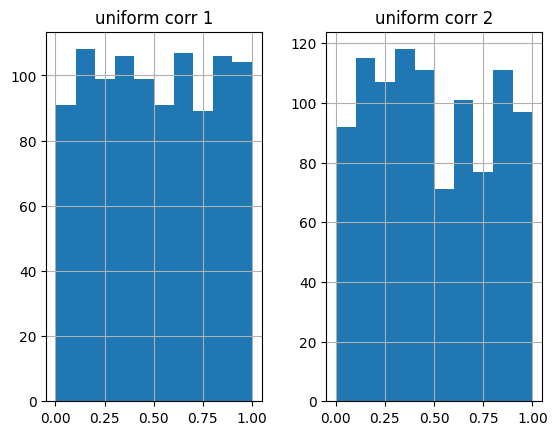

In [22]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [23]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [24]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [25]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [26]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [27]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [28]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [29]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [30]:
print(df.info())  # check your work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 800 non-null    object  
 1   given_name             700 non-null    object  
 2   surname                500 non-null    object  
 3   date_of_birth          800 non-null    object  
 4   phone_number           900 non-null    object  
 5   email                  950 non-null    object  
 6   address                627 non-null    object  
 7   city                   851 non-null    object  
 8   state                  856 non-null    object  
 9   zipcode                633 non-null    object  
 10  informative_1          1000 non-null   float64 
 11  informative_2          1000 non-null   float64 
 12  target                 1000 non-null   float64 
 13  class                  1000 non-null   int64   
 14  corr_feature_class     700 non-null    fl

In [31]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   binary                 808 non-null    object  
 1   given_name             707 non-null    object  
 2   surname                505 non-null    object  
 3   date_of_birth          807 non-null    object  
 4   phone_number           909 non-null    object  
 5   email                  958 non-null    object  
 6   address                633 non-null    object  
 7   city                   859 non-null    object  
 8   state                  865 non-null    object  
 9   zipcode                640 non-null    object  
 10  semi_constant_2        1010 non-null   object  
 11  multicollinearity 3    706 non-null    float64 
 12  constant_1             1010 non-null   object  
 13  random choice 2        709 non-null    object  
 14  informative_2          1010 non-null 

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,random label num 3,standard scaling,corr_feature_class,informative_1,constant_2,class
0,NaN,Shawn,NaN,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,045 Fowler Spring Apt. 450,West Bruce,MA,32951,...,0.336978,-1.030274,0.768145,0.371535,label num lo 3,53962.853545,3.184217,-0.999102,constant_value,1
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,NaN,76988 Tony Plains Suite 161,Shannonhaven,ME,NaN,...,0.832943,NaN,0.274048,0.195892,label num lo 3,42805.421121,NaN,1.246686,constant_value,1
2,binary_1,NaN,NaN,1944-02-04,001-877-232-0290x332,NaN,NaN,Kaylafort,WA,03222,...,0.685752,0.844525,0.188039,-0.239963,label num lo 2,42575.623356,NaN,0.962777,constant_value,1
3,binary_2,NaN,NaN,NaN,768-419-9512x282,hcollins@example.net,585 Rivas River,East Rachel,DC,NaN,...,0.777135,0.174121,1.784847,-0.770139,label num lo 1,46758.872175,4.950943,-2.957441,constant_value,1
4,binary_1,Shannon,Williamson,1993-01-06,NaN,davidanderson@example.org,322 Roberts Mountains Suite 220,Katiebury,KS,83537,...,0.992948,NaN,0.846802,0.968097,label num lo 1,64374.589787,2.071837,1.141165,constant_value,1


In [33]:
df.to_csv('created_raw_data.csv', index=False)

# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [37]:
import pandas as pd

df = pd.read_csv('/content/created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 808 non-null    object 
 1   given_name             707 non-null    object 
 2   surname                505 non-null    object 
 3   date_of_birth          807 non-null    object 
 4   phone_number           909 non-null    object 
 5   email                  958 non-null    object 
 6   address                633 non-null    object 
 7   city                   859 non-null    object 
 8   state                  865 non-null    object 
 9   zipcode                640 non-null    float64
 10  semi_constant_2        1010 non-null   object 
 11  multicollinearity 3    706 non-null    float64
 12  constant_1             1010 non-null   object 
 13  random choice 2        709 non-null    object 
 14  informative_2          1010 non-null   float6

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,random label num 3,standard scaling,corr_feature_class,informative_1,constant_2,class
0,NaN,Shawn,NaN,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,045 Fowler Spring Apt. 450,West Bruce,MA,32951.0,...,0.336978,-1.030274,0.768145,0.371535,label num lo 3,53962.853545,3.184217,-0.999102,constant_value,1
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,NaN,76988 Tony Plains Suite 161,Shannonhaven,ME,NaN,...,0.832943,NaN,0.274048,0.195892,label num lo 3,42805.421121,NaN,1.246686,constant_value,1
2,binary_1,NaN,NaN,1944-02-04,001-877-232-0290x332,NaN,NaN,Kaylafort,WA,3222.0,...,0.685752,0.844525,0.188039,-0.239963,label num lo 2,42575.623356,NaN,0.962777,constant_value,1
3,binary_2,NaN,NaN,NaN,768-419-9512x282,hcollins@example.net,585 Rivas River,East Rachel,DC,NaN,...,0.777135,0.174121,1.784847,-0.770139,label num lo 1,46758.872175,4.950943,-2.957441,constant_value,1
4,binary_1,Shannon,Williamson,1993-01-06,NaN,davidanderson@example.org,322 Roberts Mountains Suite 220,Katiebury,KS,83537.0,...,0.992948,NaN,0.846802,0.968097,label num lo 1,64374.589787,2.071837,1.141165,constant_value,1


## Var Types

In [38]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index([], dtype='object')

In [41]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Correlation

In [42]:
# code along
df._get_numeric_data().corr().round(2)

,zipcode,multicollinearity 3,informative_2,correlated w target 2,uniform corr 1,target,min max scaling,correlated w target 1,outliers 2,multicollinearity 1,duplicate_2,duplicate_1,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,standard scaling,corr_feature_class,informative_1,class
zipcode,1.00,0.02,0.08,0.03,0.09,0.07,-0.00,0.06,-0.01,-0.02,0.08,0.07,0.11,-0.01,0.03,0.00,0.01,0.09,0.07,0.05
multicollinearity 3,0.02,1.00,0.02,0.04,-0.06,0.02,-0.03,0.03,0.01,0.07,0.02,0.00,0.09,0.07,-0.00,0.89,-0.00,0.05,0.00,0.04
informative_2,0.08,0.02,1.00,0.70,0.71,0.99,-0.06,0.52,-0.05,-0.01,1.00,0.10,0.72,-0.01,0.01,-0.02,-0.06,0.33,0.10,0.72
correlated w target 2,0.03,0.04,0.70,1.00,0.48,0.69,-0.06,0.44,-0.01,-0.01,0.70,0.05,0.50,0.02,0.02,-0.02,-0.05,0.21,0.05,0.50
uniform corr 1,0.09,-0.06,0.71,0.48,1.00,0.72,-0.04,0.45,-0.00,0.01,0.71,-0.00,0.52,-0.06,0.01,-0.02,-0.01,0.25,-0.00,0.55
target,0.07,0.02,0.99,0.69,0.72,1.00,-0.06,0.53,-0.05,-0.01,0.99,-0.03,0.72,-0.02,0.02,-0.01,-0.06,0.33,-0.03,0.72
min max scaling,-0.00,-0.03,-0.06,-0.06,-0.04,-0.06,1.00,-0.03,0.02,0.01,-0.06,0.03,-0.02,-0.02,-0.03,-0.03,-0.01,-0.03,0.03,-0.04
correlated w target 1,0.06,0.03,0.52,0.44,0.45,0.53,-0.03,1.00,-0.03,-0.03,0.52,-0.08,0.37,-0.01,-0.02,-0.02,-0.06,0.20,-0.08,0.41
outliers 2,-0.01,0.01,-0.05,-0.01,-0.00,-0.05,0.02,-0.03,1.00,0.04,-0.05,-0.01,-0.07,0.06,0.01,0.04,-0.02,-0.02,-0.01,-0.04
multicollinearity 1,-0.02,0.07,-0.01,-0.01,0.01,-0.01,0.01,-0.03,0.04,1.00,-0.01,0.05,0.00,0.71,-0.01,0.08,0.01,-0.02,0.05,-0.02


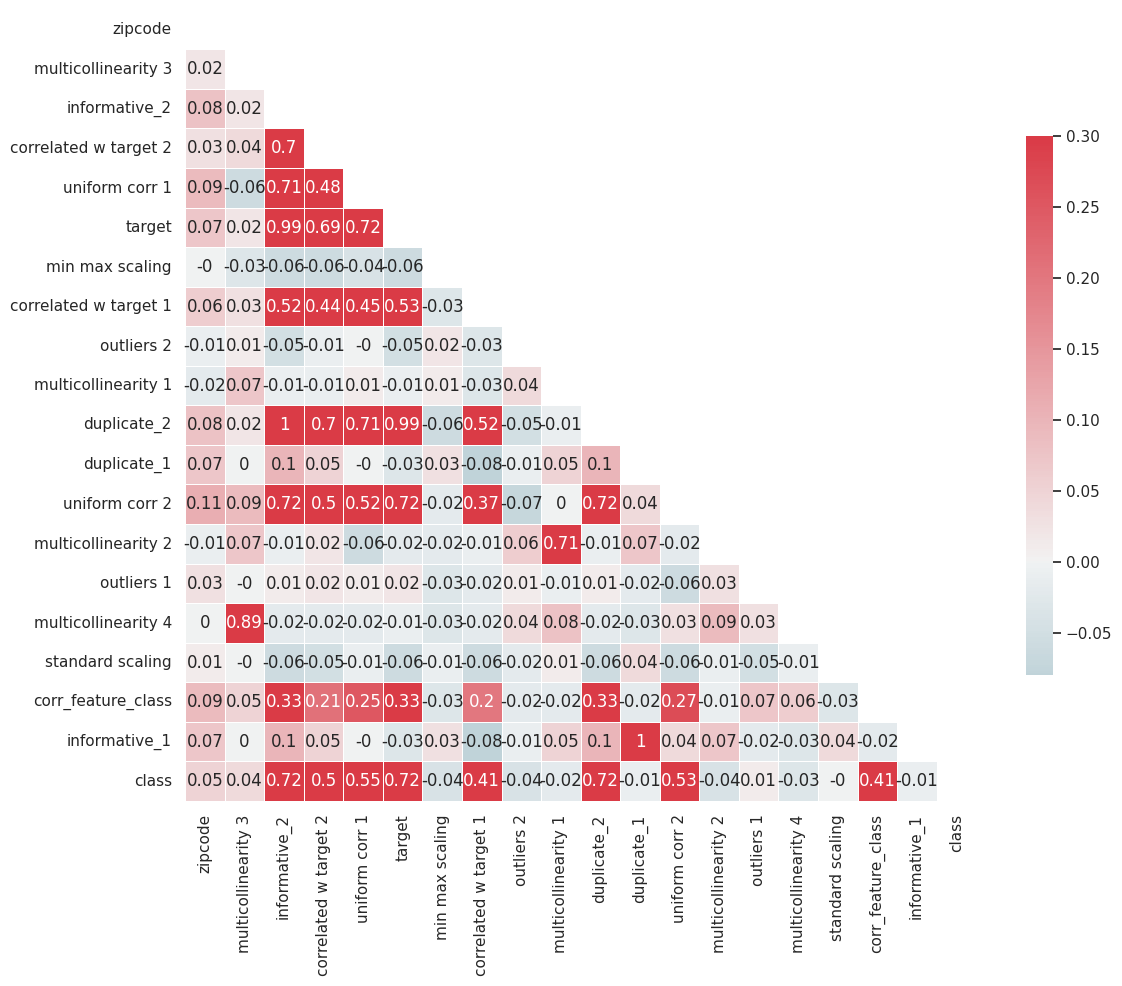

In [43]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [45]:
import pickle

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
with open('correlation_scores.pkl', 'wb') as f:
    pickle.dump(data, f)

                feature1             feature2  correlation
202          duplicate_2        informative_2     1.000000
50         informative_2          duplicate_2     1.000000
371        informative_1          duplicate_1     1.000000
238          duplicate_1        informative_1     1.000000
102               target        informative_2     0.991500
45         informative_2               target     0.991500
205          duplicate_2               target     0.991500
110               target          duplicate_2     0.991500
301  multicollinearity 4  multicollinearity 3     0.892170
35   multicollinearity 3  multicollinearity 4     0.892170
385                class               target     0.722662
119               target                class     0.722662
242       uniform corr 2        informative_2     0.719346
52         informative_2       uniform corr 2     0.719346
250       uniform corr 2          duplicate_2     0.719346
212          duplicate_2       uniform corr 2     0.7193

In [46]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf
                 Variable           VIF
0                 zipcode  1.015063e+00
1     multicollinearity 3  2.138212e+00
2           informative_2           inf
3   correlated w target 2  1.632060e+00
4          uniform corr 1  1.593898e+00
5                  target  1.207466e+04
6         min max scaling  1.006369e+00
7   correlated w target 1  1.284399e+00
8              outliers 2  1.011648e+00
9     multicollinearity 1  1.333993e+00
10            duplicate_2           inf
11            duplicate_1           inf
12         uniform corr 2  1.886804e+00
13    multicollinearity 2  1.333909e+00
14             outliers 1  1.018405e+00
15    multicollinearity 4  2.137935e+00
16       standard scaling  1.011458e+00
17     corr_feature_class  1.098084e+00
18          informative_1           inf


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [48]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
with open('vif.pkl', 'wb') as f:
    pickle.dump(data, f)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
target 12074.657735332685
standard scaling 16.509736989144567
min max scaling 10.533162983803953
                 Variable       VIF
0                 zipcode  4.709757
1     multicollinearity 3  2.146030
2   correlated w target 2  1.641712
3          uniform corr 1  5.929228
4   correlated w target 1  1.289687
5              outliers 2  2.506762
6     multicollinearity 1  1.332343
7             duplicate_2  2.318223
8          uniform corr 2  5.757291
9     multicollinearity 2  1.333232
10             outliers 1  1.015404
11    multicollinearity 4  2.146127
12     corr_feature_class  1.772506
13          informative_1  1.042471


In [49]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


target 12074.657735332685


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


min max scaling 14.361745578967106


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
standard scaling 12.10853858747324
                 Variable       VIF
0                 zipcode  4.709757
1     multicollinearity 3  2.146030
2   correlated w target 2  1.641712
3          uniform corr 1  5.929228
4   correlated w target 1  1.289687
5              outliers 2  2.506762
6     multicollinearity 1  1.332343
7             duplicate_2  2.318223
8          uniform corr 2  5.757291
9     multicollinearity 2  1.333232
10             outliers 1  1.015404
11    multicollinearity 4  2.146127
12     corr_feature_class  1.772506
13          informative_1  1.042471


In [50]:
print(removed1)
print(removed2)

['informative_2', 'duplicate_1', 'target', 'standard scaling', 'min max scaling']
['informative_2', 'target', 'min max scaling', 'duplicate_1', 'standard scaling']


## Outliers

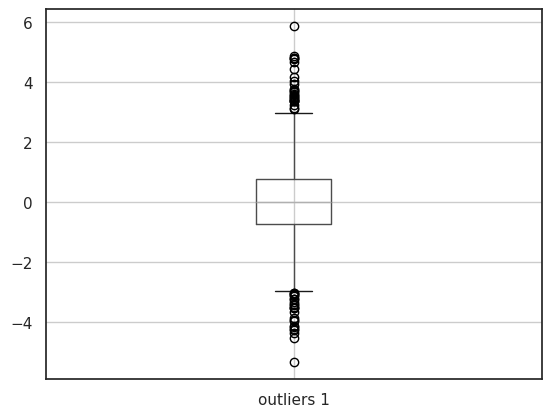

In [51]:
# code along
df.boxplot(column=['outliers 1']);

In [52]:
# code along
df.describe()

,zipcode,multicollinearity 3,informative_2,correlated w target 2,uniform corr 1,target,min max scaling,correlated w target 1,outliers 2,multicollinearity 1,duplicate_2,duplicate_1,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,standard scaling,corr_feature_class,informative_1,class
count,640.000000,706.000000,1010.000000,809.000000,707.000000,1010.000000,708.000000,707.000000,1010.000000,960.000000,1010.000000,1010.000000,910.000000,505.000000,910.000000,1010.000000,959.000000,706.000000,1010.000000,1010.000000
mean,48910.367188,0.056643,-0.018978,0.233254,0.512668,0.195609,353.181318,0.204917,2.915737,0.008584,-0.018978,-0.047372,0.491121,0.027540,0.015394,0.074832,49742.185097,1.993455,-0.047372,0.502970
std,28281.011740,0.976155,1.403413,3.061201,0.290183,2.991347,96.725339,3.051595,2.224509,0.986489,1.403413,1.324010,0.288899,0.997418,1.407682,0.993215,9799.815458,2.975748,1.324010,0.500239
min,847.000000,-3.351099,-4.543441,-10.116132,0.002162,-8.943212,15.913192,-6.721991,-4.812921,-3.366206,-4.543441,-3.836929,0.003578,-3.090673,-5.326487,-3.217381,17902.776155,-13.169188,-3.836929,0.000000
25%,25488.500000,-0.569616,-1.050339,-1.882708,0.259459,-2.166961,291.462655,-1.869868,1.384776,-0.645294,-1.050339,-1.018399,0.246506,-0.638674,-0.730369,-0.577756,43539.569260,0.306746,-1.018399,0.000000
50%,48578.500000,0.051905,-0.194004,0.120940,0.507277,-0.011259,346.027763,0.004724,2.898442,-0.013753,-0.194004,-0.224366,0.462612,0.053279,0.016738,0.103157,50073.227675,2.056788,-0.224366,1.000000
75%,72974.750000,0.716370,0.991017,2.184106,0.775120,2.367192,419.878369,2.269681,4.409038,0.679950,0.991017,0.975364,0.740412,0.685065,0.756294,0.748461,56162.359713,3.619112,0.975364,1.000000
max,99910.000000,3.117388,4.020262,8.943147,0.999846,9.299296,677.000587,10.031478,11.755554,3.044751,4.020262,3.994644,0.999809,2.673820,5.861472,4.131947,77666.806351,13.804090,3.994644,1.000000


In [56]:
# Calculate outliers for the 'outliers 1' column (example)
Q1 = df['outliers 1'].quantile(0.25)
Q3 = df['outliers 1'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['outliers 1'] < (Q1 - 1.5 * IQR)) | (df['outliers 1'] > (Q3 + 1.5 * IQR))]

# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [57]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 808 non-null    object 
 1   given_name             707 non-null    object 
 2   surname                505 non-null    object 
 3   date_of_birth          807 non-null    object 
 4   phone_number           909 non-null    object 
 5   email                  958 non-null    object 
 6   address                633 non-null    object 
 7   city                   859 non-null    object 
 8   state                  865 non-null    object 
 9   zipcode                640 non-null    float64
 10  semi_constant_2        1010 non-null   object 
 11  multicollinearity 3    706 non-null    float64
 12  constant_1             1010 non-null   object 
 13  random choice 2        709 non-null    object 
 14  informative_2          1010 non-null   float64
 15  corr

# Part 3 - Data Prep

https://www.udemy.com/course/feature-engineering-for-machine-learning

* Types and characteristics of data
* Missing data imputation
* Categorical encoding
* Variable transformation
* Discretization
* Outliers
* Datetime
* Scaling
* Feature creation

## Load Data

In [71]:
import pandas as pd

df = pd.read_csv('/content/created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 808 non-null    object 
 1   given_name             707 non-null    object 
 2   surname                505 non-null    object 
 3   date_of_birth          807 non-null    object 
 4   phone_number           909 non-null    object 
 5   email                  958 non-null    object 
 6   address                633 non-null    object 
 7   city                   859 non-null    object 
 8   state                  865 non-null    object 
 9   zipcode                640 non-null    float64
 10  semi_constant_2        1010 non-null   object 
 11  multicollinearity 3    706 non-null    float64
 12  constant_1             1010 non-null   object 
 13  random choice 2        709 non-null    object 
 14  informative_2          1010 non-null   float6

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,random label num 3,standard scaling,corr_feature_class,informative_1,constant_2,class
0,NaN,Shawn,NaN,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,045 Fowler Spring Apt. 450,West Bruce,MA,32951.0,...,0.336978,-1.030274,0.768145,0.371535,label num lo 3,53962.853545,3.184217,-0.999102,constant_value,1
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,NaN,76988 Tony Plains Suite 161,Shannonhaven,ME,NaN,...,0.832943,NaN,0.274048,0.195892,label num lo 3,42805.421121,NaN,1.246686,constant_value,1
2,binary_1,NaN,NaN,1944-02-04,001-877-232-0290x332,NaN,NaN,Kaylafort,WA,3222.0,...,0.685752,0.844525,0.188039,-0.239963,label num lo 2,42575.623356,NaN,0.962777,constant_value,1
3,binary_2,NaN,NaN,NaN,768-419-9512x282,hcollins@example.net,585 Rivas River,East Rachel,DC,NaN,...,0.777135,0.174121,1.784847,-0.770139,label num lo 1,46758.872175,4.950943,-2.957441,constant_value,1
4,binary_1,Shannon,Williamson,1993-01-06,NaN,davidanderson@example.org,322 Roberts Mountains Suite 220,Katiebury,KS,83537.0,...,0.992948,NaN,0.846802,0.968097,label num lo 1,64374.589787,2.071837,1.141165,constant_value,1


In [72]:
import preppy.utils as utils
from preppy.version import __version__

print(__version__)

utils.report.write_report(df, thresh=.5)

PrepPy Version: 0.1.0
REPORT FOR DATA PREP

#################################################
Columns with Constant Values
#################################################
['constant_1', 'constant_2']

#################################################
Columns with Quasi-Constant Values
#################################################
['class', 'constant_1', 'constant_2']

#################################################
Duplicate Rows
#################################################
20

#################################################
Duplicate Columns
#################################################
['constant_2', 'duplicate_2', 'informative_1']

#################################################
Variables with Noticeably Higher Scales
#################################################
Features with Noticeably Higher Scales (Based on Standard Deviation):
zipcode             28281.011740
standard scaling     9799.815458
Name: std, dtype: float64

Features with Noticeably Higher Sca

In [73]:
import preppy.utils as preppy

consts = preppy.functions.identify_consts(df)
quasi_consts = preppy.functions.identify_quasi_consts(df)
duplicates = preppy.functions.check_col_duplicates(df)
print(duplicates)
print(consts)
print(quasi_consts)

['constant_2', 'duplicate_2', 'informative_1']
['constant_1', 'constant_2']
['constant_1', 'constant_2']


In [74]:
# numeric_df = df.apply(pd.to_numeric, errors='coerce')
all_deletes = list(set(consts + quasi_consts + duplicates))
for col in all_deletes:
  print(col, df[col].dtype)
  if df[col].dtype in ['float64', 'int64']:
    df_numerical.remove(col)
  elif df[col].dtype in ['object']:
    df_object.remove(col)
    df_categorical_features.remove(col)
  else:
    df_discreet.remove(col)


constant_1 object
informative_1 float64
constant_2 object
duplicate_2 float64


## PrepPy Pipeline

In [75]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import preppy.utils as preppy

pipe = [
    ('constants', preppy.classes.RemoveConstants()),
    ('quasiconsts', preppy.classes.RemoveQuasiConstants(thresh=0.8)),
    ('duplicates', preppy.classes.DropDuplicates()),
    ('missing', preppy.classes.HandleMissingValues()),
    # ('encoding', HandleCatEncodeing())
]

pipe_model = Pipeline(pipe)
data = pipe_model.fit_transform(df)
cols = [col for col in df.columns if col not in consts + quasi_consts + duplicates]
nu_df = pd.DataFrame(data, columns=cols)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   binary                 1000 non-null   object
 1   given_name             1000 non-null   object
 2   surname                1000 non-null   object
 3   date_of_birth          1000 non-null   object
 4   phone_number           1000 non-null   object
 5   email                  1000 non-null   object
 6   address                1000 non-null   object
 7   city                   1000 non-null   object
 8   state                  1000 non-null   object
 9   zipcode                1000 non-null   object
 10  semi_constant_2        1000 non-null   object
 11  multicollinearity 3    1000 non-null   object
 12  random choice 2        1000 non-null   object
 13  informative_2          1000 non-null   object
 14  correlated w target 2  1000 non-null   object
 15  uniform corr 1        

/content/preppy/utils/functions.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfx[feat] = df[feat].fillna(df[feat].mode()[0])


In [77]:
import pickle

# Load the pickled variable from the file
with open('var_types.pkl', 'rb') as f:
    var_types = pickle.load(f)

print(var_types)

{'df_numerical': ['zipcode', 'multicollinearity 3', 'informative_2', 'correlated w target 2', 'uniform corr 1', 'target', 'min max scaling', 'correlated w target 1', 'outliers 2', 'multicollinearity 1', 'duplicate_2', 'duplicate_1', 'uniform corr 2', 'multicollinearity 2', 'outliers 1', 'multicollinearity 4', 'standard scaling', 'corr_feature_class', 'informative_1', 'class'], 'df_object': ['binary', 'given_name', 'surname', 'date_of_birth', 'phone_number', 'email', 'address', 'city', 'state', 'semi_constant_2', 'constant_1', 'random choice 2', 'pd qcut1', 'semi_constant_1', 'pd qcut3', 'random choice 7', 'random choice 4', 'pd qcut2', 'random label num 14', 'random label num 3', 'constant_2'], 'df_discreet': [], 'df_categorical_features': ['binary', 'given_name', 'surname', 'date_of_birth', 'phone_number', 'email', 'address', 'city', 'state', 'semi_constant_2', 'constant_1', 'random choice 2', 'pd qcut1', 'semi_constant_1', 'pd qcut3', 'random choice 7', 'random choice 4', 'pd qcut2',

In [78]:
df_numerical = var_types['df_numerical']
df_object = var_types['df_object']
df_discreet = var_types['df_discreet']
df_categorical_features = var_types['df_categorical_features']

In [81]:
# code along
df_numerical = [col for col in nu_df.columns if col in var_types['df_numerical']]
nu_df[df_numerical] = nu_df[df_numerical].astype(float)
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 1000 non-null   object 
 1   given_name             1000 non-null   object 
 2   surname                1000 non-null   object 
 3   date_of_birth          1000 non-null   object 
 4   phone_number           1000 non-null   object 
 5   email                  1000 non-null   object 
 6   address                1000 non-null   object 
 7   city                   1000 non-null   object 
 8   state                  1000 non-null   object 
 9   zipcode                1000 non-null   float64
 10  semi_constant_2        1000 non-null   object 
 11  multicollinearity 3    1000 non-null   float64
 12  random choice 2        1000 non-null   object 
 13  informative_2          1000 non-null   float64
 14  correlated w target 2  1000 non-null   float64
 15  unifo

## Feature Engineering

### Feature Combination

In [82]:
# create a new variable by combining two variables
df['scaling_combined'] = df['standard scaling'] + df['min max scaling']
df.drop(['standard scaling', 'min max scaling'], axis=1, inplace=True)

### Categorical Encoding

In [86]:
# code along
import preppy.utils as utils

# Impute missing values before applying do_OHE
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df = utils.functions.do_OHE(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             808 non-null    float64
 1   given_name                         1010 non-null   float64
 2   surname                            1010 non-null   float64
 3   date_of_birth                      1010 non-null   float64
 4   phone_number                       1010 non-null   float64
 5   email                              1010 non-null   float64
 6   address                            1010 non-null   float64
 7   city                               1010 non-null   float64
 8   state                              1010 non-null   float64
 9   zipcode                            640 non-null    float64
 10  multicollinearity 3                706 non-null    float64
 11  random choice 2                    1010 non-null   int64

In [88]:
df.to_csv('prepared_data.csv', index=False)

# Part 4 - Feature Selection

In [89]:
# get data
import pandas as pd

# df = pd.read_csv('.../prepared_data.csv')
df = pd.read_csv('/content/drive/MyDrive/Project CICD/make_me_data_science_v.csv')
print(df.shape)
print(df.info())
df.head()

(1000, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             1000 non-null   int64  
 1   given_name                         1000 non-null   float64
 2   surname                            1000 non-null   float64
 3   date_of_birth                      1000 non-null   float64
 4   phone_number                       1000 non-null   float64
 5   email                              1000 non-null   float64
 6   address                            1000 non-null   float64
 7   city                               1000 non-null   float64
 8   state                              1000 non-null   float64
 9   zipcode                            1000 non-null   float64
 10  target                             1000 non-null   float64
 11  uniform corr 2                     1000 non-nu

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,pd qcut2_Q2,pd qcut2_Q3,pd qcut2_Q4,random choice 4_North,random choice 4_South,random choice 4_West,semi_constant_1_q_const_0_1,semi_constant_1_q_const_0_2,semi_constant_2_q_const_0_1,semi_constant_2_q_const_0_2
0,0,0.007,0.001,0.502,0.201,0.302,0.001,0.001,0.571,0.001,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.014,0.001,0.001,0.001,0.001,0.001,0.001,0.571,0.001,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.014,0.003,0.502,0.001,0.001,0.291,0.108,0.571,0.155,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0.007,0.002,0.001,0.001,0.001,0.291,0.108,0.571,0.155,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.016,0.318,0.001,0.201,0.302,0.001,0.001,0.571,0.001,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [90]:
# seed
import random

seed_id = 11774987
random_state = random.seed(seed_id)
random_state

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((700, 43), (300, 43))

### Mutual Information

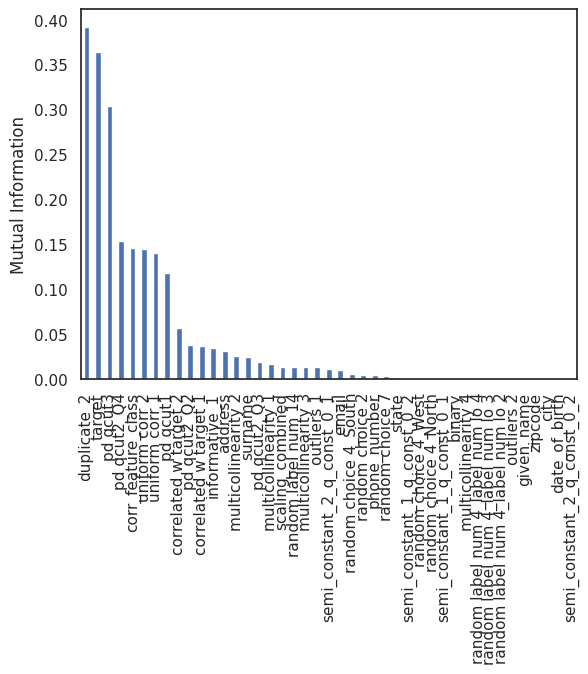

In [92]:
# mutual information
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

In [93]:
mi_keepers = mi.sort_values(ascending=False).index[:5]
print(mi_keepers)

Index(['duplicate_2', 'target', 'pd qcut3', 'pd qcut2_Q4',
       'corr_feature_class'],
      dtype='object')


### SelectKBest

In [94]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

selector = SelectKBest(f_classif, k=5) # Select the top 5 features
X_new = selector.fit(X_train, y_train)

kb_keepers = X_train.columns.values[selector.get_support()]
print(kb_keepers)

['target' 'uniform corr 1' 'duplicate_2' 'pd qcut1' 'pd qcut2_Q4']


### Select From Model

In [95]:
# Select from model
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

selections = SelectFromModel(estimator=LogisticRegression()).fit(X_scaled, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['state' 'zipcode' 'target' 'uniform corr 1' 'duplicate_2'
 'random choice 7' 'informative_1' 'corr_feature_class' 'pd qcut2_Q4'
 'random choice 4_North' 'random choice 4_South'
 'semi_constant_1_q_const_0_2']


### Recursive Feature Elmination

In [96]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['state' 'zipcode' 'target' 'uniform corr 1' 'duplicate_2'
 'random choice 7' 'informative_1' 'corr_feature_class' 'pd qcut2_Q4'
 'random choice 4_North' 'random choice 4_South'
 'semi_constant_1_q_const_0_2']


### Review Pickled Variables

* Correlated features
* VIF
* Outliers

### Random Forest Importance


In [97]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=random_state), max_features=4)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['target', 'uniform corr 1', 'duplicate_2', 'pd qcut3']

Scenario: We are trying to classify if a user will subscribe to our YouTube channel.

Lets grab the first four features from feature importance and rename them using the following suggestions:

**Numerical Features**

*   **Watch Time (seconds)**: Measures the total time viewers spend watching your videos.
*   **Average View Duration (seconds)**: The average length of time viewers watch a single video.
*   **Click-Through Rate (CTR)**: The percentage of viewers who click on your video after seeing the thumbnail/title.
*   **Comments per Video**: The number of comments on each video.
*   **Shares per Video**: The number of times each video is shared.
*   **Likes per Video**: The number of likes on each video.
*   **Dislikes per Video**: The number of dislikes on each video.
*   **Subscribers Gained per Video**: The number of subscribers gained after a video is published.
*   **Views per Video**: The total number of views for each video.

**Categorical Features**

*   **Video Category**: The category or genre of the video (e.g., tutorial, review, vlog).
*   **Upload Frequency**: How often you upload videos (e.g., daily, weekly, monthly).
*   **Video Length**: Categorize videos based on length (e.g., short, medium, long).
*   **Thumbnail Type**: The type of thumbnail used (e.g., image, text overlay, face).
*   **Use of Background Music**: Whether the video uses background music or not.
*   **Use of End Screens**: Whether the video includes end screens or not.
*   **Viewer Gender**: The dominant gender of your viewers (if available).
*   **Viewer Age**: The dominant age group of your viewers (if available).
*   **Viewer Location**: The primary location of your viewers (if available).

**Discrete Features**

*   **Number of Videos Uploaded**: The total number of videos on your channel.
*   **Channel Age (months)**: The age of your YouTube channel.
*   **Number of Playlists**: The total number of playlists on your channel.
*   **Use of Subtitles**: Whether your videos include subtitles (0 or 1).
*   **Use of Closed Captions**: Whether your videos include closed captions (0 or 1).
*   **Viewer Engagement Level**: Categorize viewer engagement into levels (e.g., low, medium, high).
*   **Video Quality**: Categorize video quality (e.g., low, medium, high).
*   **Subscriber Count**: The total number of subscribers to your channel.





In [98]:
features_to_model = rfi
X_train[features_to_model].head()

,target,uniform corr 1,duplicate_2,pd qcut3
360,-2.741124,0.449491,-1.412515,0.097
963,4.464223,0.750477,2.292819,0.193
507,-0.122101,0.407996,-0.161470,0.188
781,-3.052789,0.235659,-1.802291,0.097
149,0.993651,0.913562,0.383407,0.185


In [99]:
new_column_names = {rfi[0]: 'watch_time', rfi[1]: 'avg_view_duration', rfi[2]: 'click_through_rate', rfi[3]: 'interest'}
X_train.rename(columns=new_column_names, inplace=True)
X_test.rename(columns=new_column_names, inplace=True)
features_to_model = list(new_column_names.values())
X_train = X_train[features_to_model]
X_test = X_test[features_to_model]

In [101]:
import pickle

# Save the data
with open('train_test_split.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [102]:
import shutil

# Source file path (within your Drive)
source_file = 'train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = '/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Part 5 - Data Modeling

## Get Data

In [103]:
# seed
import random

seed_id = 11774987
random_state = random.seed(seed_id)
random_state

In [104]:
import shutil

# Source file path (within your Drive)
source_file = '/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = 'train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'train_test_split.pkl'

In [106]:
import pickle

# Load the data
with open('train_test_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

## Logistic Regression

In [107]:
# model, predict, evaluate, and plot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression(solver='liblinear', random_state=random_state)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[119  24]
 [ 19 138]]
0.8566666666666667


## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=random_state)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[120  23]
 [ 19 138]]
0.86


## Model Evaluation

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('accuracy:', accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy: 0.86
[[120  23]
 [ 19 138]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       143
         1.0       0.86      0.88      0.87       157

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



## Model Fine-Tuning

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = {'max_depth': [2, 3],
              'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 5],
              'bootstrap': [True, False],
              'criterion': ['entropy', 'gini']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.8671428571428571
best parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4}


## Final Model

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=random_state).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train.values, y_train)
predictions = model.predict(X_test.values)
print('accuracy:', accuracy_score(predictions, y_test))

accuracy: 0.87


## Confusion Matrix

In [112]:
print(confusion_matrix(y_test, predictions))

[[115  28]
 [ 11 146]]


## Precision Recall

In [113]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.86       143
         1.0       0.84      0.93      0.88       157

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



## Bias Variance

In [114]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    model,
    X_train.values, # Convert X_train to NumPy array
    y_train.values, # Convert y_train to NumPy array
    X_test.values, # Convert X_test to NumPy array
    y_test.values, # Convert y_test to NumPy array
    loss='0-1_loss',
    random_seed=random_state)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

# Average expected loss: 0.087
# Average bias: 0.080
# Average variance: 0.034

Average expected loss: 0.134
Average bias: 0.127
Average variance: 0.022


In [115]:
X_test.head()

,watch_time,avg_view_duration,click_through_rate,interest
612,0.844716,0.776083,0.284810,0.188
660,-0.122425,0.811731,-0.196283,0.188
168,-3.265048,0.091849,-1.421401,0.097
350,3.723919,0.001996,1.944370,0.193
187,-1.894662,0.220398,-0.605270,0.244


In [116]:
import pandas as pd

sample_to_predict = pd.Series({"watch_time": -8.1, "avg_view_duration": 1.4, "click_through_rate": -0.7, "interest": 0})
sample_to_predict = pd.DataFrame([sample_to_predict])
model.predict_proba(sample_to_predict.values)

array([[0.91841801, 0.08158199]])

In [118]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [119]:
import shutil

# Source file path (within your Drive)
source_file = 'model.pkl'

# Destination path (root of your Drive)
destination_path = '/content/drive/MyDrive/Colab Notebooks/model.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'/content/drive/MyDrive/Colab Notebooks/model.pkl'

# Part 6 - Gradio

In [120]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [121]:
import shutil

# Source file path (within your Drive)
source_file = '/content/drive/MyDrive/Colab Notebooks/model.pkl'

# Destination path (root of your Drive)
destination_path = 'model.pkl'

# Copy the file
shutil.copy(source_file, destination_path)

'model.pkl'

In [123]:
import pickle

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [124]:
import pandas as pd

def predict_subscribe(watch, duration, ctr, interest):
    data = [{"watch_time": watch, "avg_view_duration": duration, "click_through_rate": ctr, "interest": interest}]
    sample = pd.DataFrame(data)
    pred = model.predict_proba(sample.values)[0]
    return {'Misses Out': pred[0], 'Subscribes': pred[1]}

print(predict_subscribe(-8.1, 1.4, -0.7, 0))

{'Misses Out': 0.9184180098767506, 'Subscribes': 0.08158199012324906}


In [125]:
# def predict_subscribe(watch, duration, ctr, interest):
import gradio as gr

watch = gr.Slider(minimum=-9, maximum=12, label="Watch")
duration = gr.Slider(minimum=-4, maximum=4, label="Duration")
ctr = gr.Slider(minimum=-5, maximum=5, label="Click Through Rate")
interest = gr.Radio([0, 1], label="Interest")

gr.Interface(predict_subscribe, [watch, duration, ctr, interest], "label", live=False).launch();

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://812aed5f7cec22fb7e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
